In [ ]:
# group6_project.py
# Satchytan Karalasingham, Romil Dhagat
#
'''
A terminal-based application for computing and printing statistics based on given input.
You must include the main listed below. You may add your own additional classes, functions, variables, etc. 
You may import any modules from the standard Python library.
Remember to include docstrings and comments.
'''

import pandas as pd
import matplotlib.pyplot as plt

def main():

    print("ENSF 592 Group 6 Project")

    # Stage 2: DataFrame Creation
    
    # Import the Excel data into a Pandas DataFrames.
    df_goog = pd.read_excel('Google_Data.xlsx')
    df_meta = pd.read_excel('META_Data.xlsx')
    df_msft = pd.read_excel('Microsoft_data.xlsx')
    df_tsla = pd.read_excel('Tesla_Data.xlsx')

    # Merge the four DataFrames based on a common column
    # merged_df = pd.merge(df_goog, df_meta, on='Date')
    # merged_df = pd.merge(merged_df, df_msft, on='Date')
    # merged_df = pd.merge(merged_df, df_tsla, on='Date')

    # Remove any duplicated columns resulting from the merge
    # merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

    # Create a hierarchical index using two levels (row or column)
    # merged_df.set_index(['Date'] , inplace=True)                      # RD : Removed ['Stock']

    # Sort the data based on the index
    # merged_df.sort_index(inplace=True)


    data_dict = {
        'GOOG': df_goog,
        'META': df_meta,
        'MSFT': df_msft,
        'TSLA': df_tsla
    }

    # Stage 3: User Input
    # Prompt the user to enter a stock ticker.
    while True:
        print("There are four stocks to compare: GOOG, MSFT, TSLA, META")
        ticker1 = input("Please enter a stock ticker: ").upper()
        ticker2 = input("Please enter another stock ticker: ").upper()

        data1 = data_dict.get(ticker1)
        data2 = data_dict.get(ticker2)

        try:
            # Check if both DataFrames exist
            if data1 is not None and data2 is not None:
                # Merge the selected DataFrames based on a common column
                merged_df = pd.merge(data1, data2, on='Date')
                # Remove any duplicated columns resulting from the merge
                merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()] 
                # Create a hierarchical index using two levels (row or column)
                merged_df.set_index(['Date'], inplace=True) 
                # Sort the data based on the index
                merged_df.sort_index(inplace=True)
            else:
                print('Invalid ticker combination')
                raise KeyError
            break
        except KeyError:
            print("Invalid stock ticker. Please try again.\n")
            continue

    print("\nFiltered Data:")
    print(merged_df)

    # Aggregate statistics using describe method
    print("\nAggregate Statistics:")
    print(merged_df.describe())
    
    # Add two columns to the dataset
    merged_df['Daily Return_x'] = merged_df['Close_x'] - merged_df['Open_x']
    merged_df['Daily Return_y'] = merged_df['Close_y'] - merged_df['Open_y']
    merged_df['Volume in Millions'] = merged_df['Volume_x'] / 1000000

    print(merged_df['Daily Return_x'])

    # Perform aggregation computation for a subset of data
    # mean_return = merged_df.loc[(slice(None), [ticker1, ticker2]), 'Daily Return'].mean()
    # print(f"\nMean Daily Return for {ticker1} and {ticker2}: {mean_return:.2f}")

    # Perform masking operation
    high_volume_df = merged_df[merged_df['Volume_x'] > 50000000]
    print("\nData with Volume > 50,000,000:")
    print(high_volume_df)

    # Perform groupby operation
    grouped_df = merged_df.groupby('Date').mean()
    print("\nGrouped Data (Mean values per stock):")
    print(grouped_df)

    # Create and print a pivot table
    pivot_table = pd.pivot_table(merged_df, values='Close_x', index='Date')
    print("\nPivot Table:")
    print(pivot_table)

    # Stage 5: Export and Matplotlib
    # Export merged DataFrame to Excel file
    merged_df.to_excel('merged_data.xlsx')


    # Create a plot using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(merged_df.index, merged_df['Close_x'], label=ticker1)
    plt.plot(merged_df.index, merged_df['Close_y'], label=ticker2)
    plt.title('Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()

    # Save the plot as a .png file
    plt.savefig('stock_prices.png')

    # Show the plot
    plt.show()

    print("\nProgram finished.")


if __name__ == '__main__':
    main()


In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# Stage 2: DataFrame Creation


# Import the Excel data into a Pandas DataFrames.
df_goog = pd.read_excel('Google_Data.xlsx')
df_meta = pd.read_excel('META_Data.xlsx')
df_msft = pd.read_excel('Microsoft_data.xlsx')
df_tsla = pd.read_excel('Tesla_Data.xlsx')

data_dict = {
        'GOOG': df_goog,
        'META': df_meta,
        'MSFT': df_msft,
        'TSLA': df_tsla
    }


df_goog["Ticker"] = "GOOG"
df_msft["Ticker"] = "MSFT"
df_tsla["Ticker"] = "TSLA"
df_meta["Ticker"] = "META"

df_goog["Idx"] = range(1, len(df_goog) + 1)
df_msft["Idx"] = range(1, len(df_msft) + 1)
df_tsla["Idx"] = range(1, len(df_tsla) + 1)
df_meta["Idx"] = range(1, len(df_meta) + 1)

df_goog["Dividends"] = df_goog["Dividends"].astype(float)
df_msft["Dividends"] = df_msft["Dividends"].astype(float)
df_tsla["Dividends"] = df_tsla["Dividends"].astype(float)
df_meta["Dividends"] = df_meta["Dividends"].astype(float)

df_goog['Daily Return'] = df_goog['Close'] - df_goog['Open']
df_msft['Daily Return'] = df_msft['Close'] - df_msft['Open']
df_meta['Daily Return'] = df_meta['Close'] - df_meta['Open']
df_tsla['Daily Return'] = df_tsla['Close'] - df_tsla['Open']

df_goog['Volume in Millions'] = df_goog['Volume'] / 1000000
df_msft['Volume in Millions'] = df_msft['Volume'] / 1000000
df_meta['Volume in Millions'] = df_meta['Volume'] / 1000000
df_tsla['Volume in Millions'] = df_tsla['Volume'] / 1000000

df_goog['Quarter'] = np.nan
df_msft['Quarter'] = np.nan
df_meta['Quarter'] = np.nan
df_tsla['Quarter'] = np.nan

df_goog.loc[df_goog['Date'].between('2022-07-01', '2022-10-01'), 'Quarter'] = 'Q3'
df_goog.loc[df_goog['Date'].between('2022-10-01', '2023-01-01'), 'Quarter'] = 'Q4'
df_goog.loc[df_goog['Date'].between('2023-01-01', '2023-04-01'), 'Quarter'] = 'Q1'
df_goog.loc[df_goog['Date'].between('2023-04-01', '2023-07-01'), 'Quarter'] = 'Q2'

df_msft.loc[df_msft['Date'].between('2022-07-01', '2022-10-01'), 'Quarter'] = 'Q3'
df_msft.loc[df_msft['Date'].between('2022-10-01', '2023-01-01'), 'Quarter'] = 'Q4'
df_msft.loc[df_msft['Date'].between('2023-01-01', '2023-04-01'), 'Quarter'] = 'Q1'
df_msft.loc[df_msft['Date'].between('2023-04-01', '2023-07-01'), 'Quarter'] = 'Q2'

df_meta.loc[df_meta['Date'].between('2022-07-01', '2022-10-01'), 'Quarter'] = 'Q3'
df_meta.loc[df_meta['Date'].between('2022-10-01', '2023-01-01'), 'Quarter'] = 'Q4'
df_meta.loc[df_meta['Date'].between('2023-01-01', '2023-04-01'), 'Quarter'] = 'Q1'
df_meta.loc[df_meta['Date'].between('2023-04-01', '2023-07-01'), 'Quarter'] = 'Q2'

df_tsla.loc[df_tsla['Date'].between('2022-07-01', '2022-10-01'), 'Quarter'] = 'Q3'
df_tsla.loc[df_tsla['Date'].between('2022-10-01', '2023-01-01'), 'Quarter'] = 'Q4'
df_tsla.loc[df_tsla['Date'].between('2023-01-01', '2023-04-01'), 'Quarter'] = 'Q1'
df_tsla.loc[df_tsla['Date'].between('2023-04-01', '2023-07-01'), 'Quarter'] = 'Q2'

df_msft = df_msft[['Idx','Ticker' , 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Volume in Millions','Dividends','Stock Splits', 'Daily Return', 'Quarter']]
df_goog = df_goog[['Idx','Ticker' , 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Volume in Millions','Dividends','Stock Splits', 'Daily Return', 'Quarter']]
df_tsla = df_tsla[['Idx','Ticker' , 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Volume in Millions','Dividends','Stock Splits', 'Daily Return', 'Quarter']]
df_meta = df_meta[['Idx','Ticker' , 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Volume in Millions','Dividends','Stock Splits', 'Daily Return', 'Quarter']]

fully_merged_df = pd.merge(df_goog, df_msft, how = 'outer')
fully_merged_df = pd.merge(fully_merged_df, df_tsla, how = 'outer')
fully_merged_df = pd.merge(fully_merged_df, df_meta, how = 'outer')

# Remove any duplicated columns resulting from the merge
fully_merged_df = fully_merged_df.loc[:, ~fully_merged_df.columns.duplicated()] 
# Create a hierarchical index using two levels (row or column)
fully_merged_df.set_index(['Idx'], inplace=True) 
# Sort the data based on the index
fully_merged_df.sort_index(inplace=True)

grouped_df = fully_merged_df.groupby('Ticker')
first_df = grouped_df.get_group('GOOG')
second_df = grouped_df.get_group('MSFT')
merged_df = pd.merge(first_df,second_df, how = 'outer')

fully_merged_df

,Ticker,Date,Open,High,Low,Close,Volume,Volume in Millions,Dividends,Stock Splits,Daily Return,Quarter
Idx,,,,,,,,,,,,
1,GOOG,2022-06-09,116.341499,118.349998,114.866997,114.917999,23142000,23.142000,0.0,0,-1.423500,NaN
1,MSFT,2022-06-09,265.216370,270.099165,262.096533,262.255005,26439700,26.439700,0.0,0,-2.961365,NaN
1,META,2022-06-09,194.279999,199.449997,183.679993,184.000000,23501600,23.501600,0.0,0,-10.279999,NaN
1,TSLA,2022-06-10,235.156662,239.500000,227.913330,232.229996,97536600,97.536600,0.0,0,-2.926666,NaN
2,META,2022-06-10,183.039993,183.100006,175.020004,175.570007,27450800,27.450800,0.0,0,-7.469986,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
250,GOOG,2023-06-07,127.574997,129.550003,122.629997,122.940002,34179300,34.179300,0.0,0,-4.634995,Q2
251,MSFT,2023-06-08,323.934998,326.630005,323.350006,325.260010,22797667,22.797667,0.0,0,1.325012,Q2
251,GOOG,2023-06-08,122.584999,123.730003,122.010002,122.669998,23954447,23.954447,0.0,0,0.084999,Q2


In [191]:
merged_df = pd.merge(df_goog, df_msft, how = 'outer')
# Remove any duplicated columns resulting from the merge
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()] 
# Create a hierarchical index using two levels (row or column)
merged_df.set_index(['Idx'], inplace=True) 
# Sort the data based on the index
merged_df.sort_index(inplace=True)
merged_df['Daily Return'] = merged_df['Close'] - merged_df['Open']
print(merged_df)

    Ticker        Date        Open        High         Low       Close  \
Idx                                                                      
1     GOOG  2022-06-09  116.341499  118.349998  114.866997  114.917999   
1     MSFT  2022-06-09  265.216370  270.099165  262.096533  262.255005   
2     GOOG  2022-06-10  112.781250  113.497002  110.861000  111.427498   
2     MSFT  2022-06-10  258.085264  258.085264  250.112345  250.567947   
3     GOOG  2022-06-13  107.445999  109.218498  106.588051  106.876503   
..     ...         ...         ...         ...         ...         ...   
249   GOOG  2023-06-06  126.599998  128.880005  125.970001  127.910004   
250   MSFT  2023-06-07  331.649994  334.489990  322.500000  323.380005   
250   GOOG  2023-06-07  127.574997  129.550003  122.629997  122.940002   
251   GOOG  2023-06-08  122.584999  123.730003  122.010002  122.669998   
251   MSFT  2023-06-08  323.934998  326.630005  323.350006  325.260010   

       Volume  Dividends  Stock Split

C:\Users\Romil\AppData\Local\Temp\ipykernel_13052\1693209538.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(df_goog, df_msft, how = 'outer')


In [219]:
import numpy as np
"""
Create a pivot table based on the average daily return per quarter.

Args:
    merged_df (pandas.DataFrame): The merged DataFrame of the two stocks' data.
"""


# Calculate the average daily return per quarter
full_pivot_table = pd.pivot_table(fully_merged_df, values='Daily Return', index='Quarter', aggfunc=np.mean)
goog_pivot_table = pd.pivot_table(df_goog, values='Daily Return', index='Quarter', aggfunc=np.mean)
msft_pivot_table = pd.pivot_table(df_msft, values='Daily Return', index='Quarter', aggfunc=np.mean)
meta_pivot_table = pd.pivot_table(df_meta, values='Daily Return', index='Quarter', aggfunc=np.mean)
tsla_pivot_table = pd.pivot_table(df_tsla, values='Daily Return', index='Quarter', aggfunc=np.mean)

pivot = pd.merge(full_pivot_table, goog_pivot_table, on = 'Quarter', suffixes = ("full","goog"))
pivot = pd.merge(pivot, msft_pivot_table, on = 'Quarter', suffixes = ("goog","msft"))
pivot = pd.merge(pivot, meta_pivot_table, on = 'Quarter', suffixes = ("msft","meta"))
pivot = pd.merge(pivot, tsla_pivot_table, on = 'Quarter', suffixes = ("meta","tsla"))

pivot.rename(columns= {
    'Daily Returnfull': 'Large CAP Growth',
    'Daily Returngoog': 'Google',
    'Daily Returnmsft': 'Microsoft',
    'Daily Returnmeta': 'META',
    'Daily Return': 'Tesla'
}, inplace=True)

print("\nPivot Table - Average Daily Return per Quarter:")
print(pivot)




Pivot Table - Average Daily Return per Quarter:
         Large CAP Growth    Google  Microsoft      META     Tesla
Quarter                                                           
Q1               0.747097  0.452630   0.479306  0.924515  1.131936
Q2               0.557737  0.374681   0.484727  0.871916  0.500832
Q3               0.091458  0.090453  -0.132541  0.191250  0.216669
Q4              -0.251531 -0.024603   0.392289  0.451111 -1.824921


In [149]:
grouped_df = merged_df.groupby('Ticker')
for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")
    print(key)
goog_df = grouped_df.get_group('GOOG')
goog_df

    Ticker        Date        Open        High         Low       Close  \
Idx                                                                      
1     GOOG  2022-06-09  116.341499  118.349998  114.866997  114.917999   
2     GOOG  2022-06-10  112.781250  113.497002  110.861000  111.427498   
3     GOOG  2022-06-13  107.445999  109.218498  106.588051  106.876503   
4     GOOG  2022-06-14  106.889999  108.457497  106.351997  107.194000   
5     GOOG  2022-06-15  108.899498  112.063004  108.118752  110.390503   
..     ...         ...         ...         ...         ...         ...   
247   GOOG  2023-06-02  124.489998  126.745003  124.349998  125.230003   
248   GOOG  2023-06-05  124.610001  127.989998  124.379997  126.629997   
249   GOOG  2023-06-06  126.599998  128.880005  125.970001  127.910004   
250   GOOG  2023-06-07  127.574997  129.550003  122.629997  122.940002   
251   GOOG  2023-06-08  122.584999  123.730003  122.010002  122.669998   

       Volume  Dividends  Stock Split

,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Idx,,,,,,,,,
1,GOOG,2022-06-09,116.341499,118.349998,114.866997,114.917999,23142000,0.0,0.0
2,GOOG,2022-06-10,112.781250,113.497002,110.861000,111.427498,31324000,0.0,0.0
3,GOOG,2022-06-13,107.445999,109.218498,106.588051,106.876503,36756000,0.0,0.0
4,GOOG,2022-06-14,106.889999,108.457497,106.351997,107.194000,25480000,0.0,0.0
5,GOOG,2022-06-15,108.899498,112.063004,108.118752,110.390503,33192000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
247,GOOG,2023-06-02,124.489998,126.745003,124.349998,125.230003,19362400,0.0,0.0
248,GOOG,2023-06-05,124.610001,127.989998,124.379997,126.629997,22672500,0.0,0.0
249,GOOG,2023-06-06,126.599998,128.880005,125.970001,127.910004,19450100,0.0,0.0


In [162]:
merged_df['Daily Return'] = merged_df['Close'] - merged_df['Open']
merged_df['Daily Return_y'] = merged_df['Close_y'] - merged_df['Open_y']
merged_df['Volume_x in Millions'] = merged_df['Volume_x'] / 1000000

KeyError: 'Close_x'

In [71]:
merged_df['Daily Return_x']

Date
2022-06-09   -1.423500
2022-06-10   -1.353752
2022-06-13   -0.569496
2022-06-14    0.304001
2022-06-15    1.491005
                ...   
2023-06-02    0.740005
2023-06-05    2.019997
2023-06-06    1.310005
2023-06-07   -4.634995
2023-06-08    0.084999
Name: Daily Return_x, Length: 251, dtype: float64

In [66]:
input1 = 'GOOG'
input2 = 'MSFT'
agg = merged_df.describe()
print(agg)
sum_vol_x = agg['Volume_x']['mean'] * agg['Volume_x']['count']
sum_vol_y = agg['Volume_y']['mean'] * agg['Volume_y']['count']
dif = abs(sum_vol_x - sum_vol_y)
if sum_vol_x > sum_vol_y:
    print(input1 + " is more frequently traded than " + input2 + " by " + str(dif) + ' volume over the past year')
else:
    print(input2 + " is more frequently traded than " + input1 + " by " + str(dif) + ' volume over the past year')
    


           Open_x      High_x       Low_x     Close_x      Volume_x  \
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02   
mean   104.010995  105.580340  102.790095  104.205895  2.786935e+07   
std     10.291166   10.452939   10.289806   10.407644  1.085316e+07   
min     85.510002   86.550003   83.449997   83.489998  8.567800e+06   
25%     95.759998   97.349998   94.470001   95.840000  2.149230e+07   
50%    102.879997  104.220001  101.860001  103.629997  2.515470e+07   
75%    111.484997  113.346752  109.567749  111.825001  3.145835e+07   
max    127.574997  129.550003  125.970001  127.910004  9.779860e+07   

       Dividends_x  Stock Splits_x      Open_y      High_y       Low_y  \
count        251.0      251.000000  251.000000  251.000000  251.000000   
mean           0.0        0.079681  261.478485  264.581994  258.628261   
std            0.0        1.262389   26.928204   26.774275   27.107045   
min            0.0        0.000000  215.924610  218.763242  211.

In [164]:
grouped_df = merged_df.groupby('Date')['Daily Return']
grouped_df['Difference'] = abs(grouped_df['Daily Return_x'] - grouped_df['Daily Return_y'])
print(grouped_df)

KeyError: 'Column not found: Daily Return'

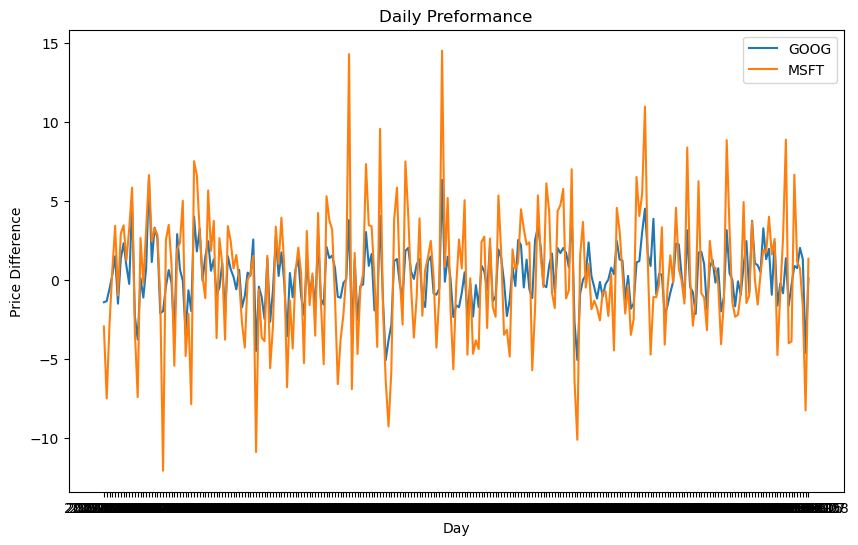

In [84]:
ticker1 = 'GOOG'
ticker2 = 'MSFT'
plt.figure(figsize=(10, 6))
plt.plot(grouped_df.index, grouped_df['Daily Return_x'], label=ticker1)
plt.plot(grouped_df.index, grouped_df['Daily Return_y'], label=ticker2)
plt.title('Daily Preformance')
plt.xlabel('Day')
plt.ylabel('Price Difference')
plt.legend()
plt.savefig('stock_prices.png')
plt.show()